# Surface Water Runoff

Building up from subsurface flow, ATS is at it's heart an integrated surface and subsurface model.  ATS solves surface flow on both prescribed, 2D meshes with an elevation supplied as data, or as a 2D surface lifted off of a 3D mesh.  Here we demonstrate some of the surface flow capabilities of ATS.

The base problem solved here is a simple ramp on which we rain and apply a series of boundary conditions.  Rain flows downhill (to the right in these images), and leaves via the right side boundary.  Note these also show the use of observations, which allow for visualization that is spatially sparse but is evaluated frequently in time.  The most common use of this is hydrographs (which is what we use this for here).

Author: Ethan Coon

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'docs', 'documentation', 'source', 'ats_demos'))

import ats_xdmf
import colors
import numpy as np
from matplotlib import pyplot as plt
import pandas
import run_demos

In [2]:
def plot(testname, force=False):
    """A generic plotting script plotting ponded depth and discharge/runoff"""
    run_demos.run_demo_local(testname, force=force)
    directory = testname+'.demo'
    
    vis = ats_xdmf.VisFile(directory, domain='surface', time_unit='s')
    vis.loadMesh(order=['x','y'])

    cm = colors.cm_mapper(vis.times[0], vis.times[-1], 'jet')
    x = vis.centroids[:,0]

    fig, ax = plt.subplots(1,2, figsize=(14,3))

    # This simply gets a colorbar axis
    C = [[0,0],[0,0]]
    C3 = ax[0].contourf(C, vis.times, cmap='jet')
    ax[0].cla()  

    pd = vis.getArray('surface-ponded_depth')
    print(pd.shape)
    elev = vis.get('surface-elevation', '0')

    #ax[0].plot(x, elev, 'k')
    for i in range(len(vis.times)):
        #ax[0].plot(x, elev + pd[i,:], color=cm(i))
        ax[0].plot(x, pd[i,:], color=cm(i))

    ax[0].set_xlabel('x-coordinate [m]')
    ax[0].set_ylabel('ponded depth [m]')
    
    hydro = pandas.read_csv(os.path.join(directory, 'surface_outlet_flux.dat'), comment='#')
    ax[1].plot(hydro["time [s]"][:]/60.0, hydro["surface outlet flux"][:], 'b')
    ax[1].set_xlabel('time [min]')
    ax[1].set_ylabel('discharge flow rate [mol/s]')
    
    cbar = plt.colorbar(C3, ax=ax[0])
    cbar.ax.set_ylabel("time [min]")
    
    plt.tight_layout()
    plt.show()


The baseline problem -- this simply rains with no flux boundaries (and hence no discharge).  The rain turns off after 60 minutes, and the simulation continues to drain for 3 hours.  Note the ponded depth plots are a little weird here, but ponded_depth << elevation, so we can't plot ponded depth + elevation as that just looks like a single line.

  Test log file : LOGS/ats-tests-2024-04-22_12-03-17.testlog
Running ATS demo problems :
03_surface_water     | .

----------------------------------------------------------------------
Regression test summary:
    Total run time: 1.01086 [s]
    Total tests : 1
    Tests run : 1
    All tests passed.


(19, 10)


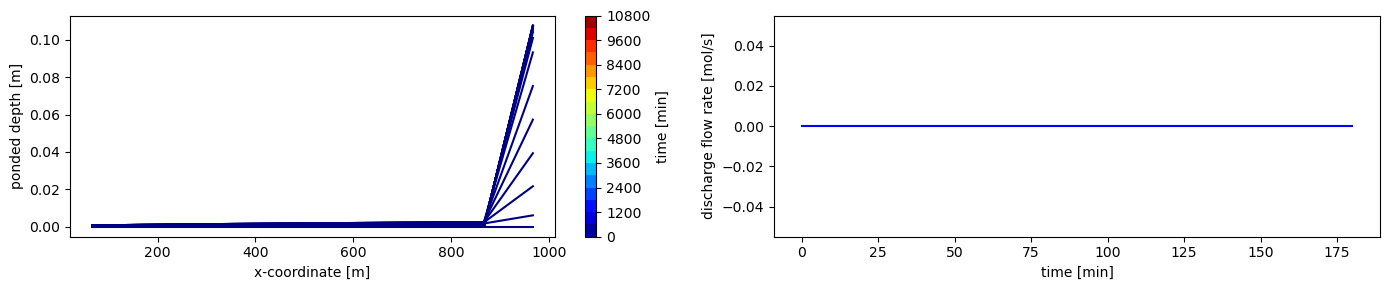

In [3]:
plot("surface_water")

Often it is useful to set a max river stage, or head boundary condition, which lets water out once the head gets above a certain level (e.g. 15 cm here).  In this example, the mesh is so coarse and the domain is sufficiently sloped that the entire domain still drains (the most downhill cell's elevation is more than 15cm about the boundary elevation), but this would not be the case in a higher-resolution or less-sloping run.

  Test log file : LOGS/ats-tests-2024-04-22_12-03-18.testlog
Running ATS demo problems :
03_surface_water     | .

----------------------------------------------------------------------
Regression test summary:
    Total run time: 1.01107 [s]
    Total tests : 1
    Tests run : 1
    All tests passed.


(19, 10)


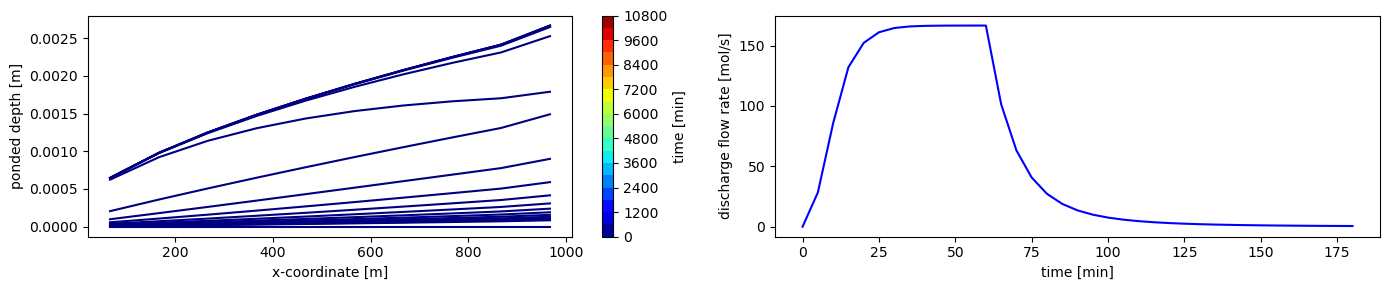

In [4]:
plot("max_head")

There are two other alternatives to setting the max ponded depth at the outlet.  The first is a "zero ponded depth gradient" boundary, where the water level is assumed to parallel the topography.  Note this is really only useful in synthetic cases, where you know that this will not result in water flowing **_into_** the domain.

  Test log file : LOGS/ats-tests-2024-04-22_12-03-19.testlog
Running ATS demo problems :
03_surface_water     | .

----------------------------------------------------------------------
Regression test summary:
    Total run time: 1.01058 [s]
    Total tests : 1
    Tests run : 1
    All tests passed.


(19, 10)


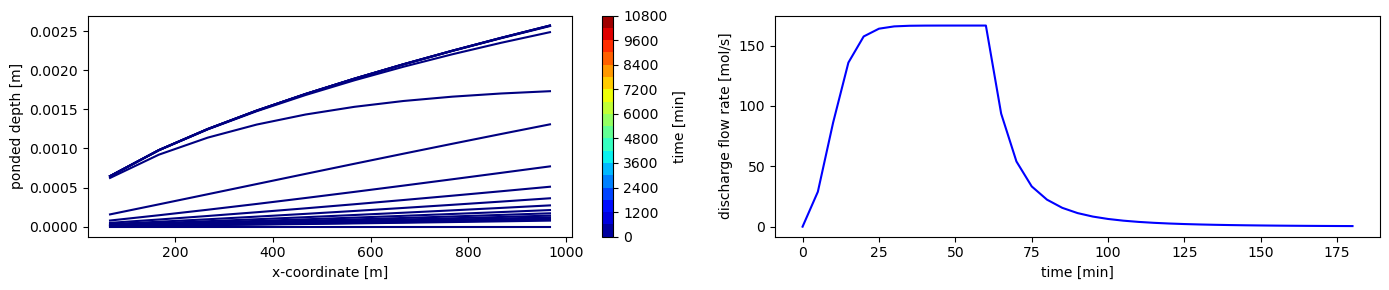

In [5]:
plot("zero_gradient")

Finally, the second is a critical depth boundary condition, which sets the flux based on ponded depth, and is standard in the literature.

$q = n_{liq} h \sqrt{gh}$

or equivalently,

$V = \sqrt{gh}$.

Note that as this goes to zero with zero ponded depth, it takes a long time to drain.

  Test log file : LOGS/ats-tests-2024-04-22_12-03-20.testlog
Running ATS demo problems :
03_surface_water     | .

----------------------------------------------------------------------
Regression test summary:
    Total run time: 1.01151 [s]
    Total tests : 1
    Tests run : 1
    All tests passed.


(19, 10)


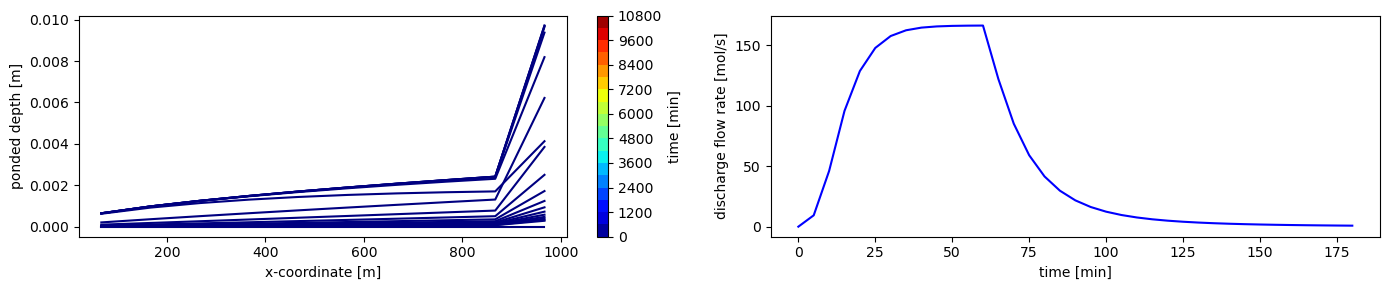

In [6]:
plot("critical_depth")